<a href="https://colab.research.google.com/github/hecshzye/food-or-not-model/blob/main/computer_vision_cnn_multi_class_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network and Computer Vision with TensorFlow (Multi-class)


This is a practice and rough work notebook for the upcoming CNN & Computer Vision projects (food-or-not)
If something from this practice notebook looks meaningful or helpful, please do not hesitate to work on it or experiment further

Working with the food-101 dataset from Kaggle - https://www.kaggle.com/dansbecker/food-101

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Importing the dataset with 10 classes (Pre-processed from the original Kaggle food-101 dataset)
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN-Computer-vision-data/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"Directories: {len(dirnames)} and {len(filenames)} images in '{dirpath}'.")

Directories: 2 and 0 images in '10_food_classes_all_data'.
Directories: 10 and 0 images in '10_food_classes_all_data/train'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/hamburger'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/ramen'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/sushi'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/steak'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/ice_cream'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/chicken_curry'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/pizza'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/chicken_wings'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/fried_rice'.
Directories: 10 and 0 images in '10_food_classes_all_data/test'.
Directories: 0 and 250 images in '10_food_

In [5]:
# train & test splits
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [8]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## Preprocessing the data

In [9]:
# Function to view images at random
import matplotlib.image as mpimg
import random
def random_image_show(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Shape of the image: {img.shape}")
  return img

Shape of the image: (512, 512, 3)


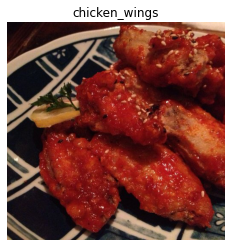

In [16]:
img = random_image_show(target_dir=train_dir,
                        target_class=random.choice(class_names)) #YUM 😋